In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Getting data into a dataframe
df = pd.read_csv('Reviews.CSV')

In [15]:
#!pip install keras

In [16]:
#!pip install numpy==1.16.1

In [3]:
# Eliminating neutral reviews i.e. those reviews with Score = 3
data_filtered = df[df['Score'] != 3]

# Converting Score variables to binary class variable (1-positive review and 0-negative review)
# Give reviews with Score>3 a positive rating (1) , and reviews with a score<3 a negative rating (0).
def polarity(x):
    if x < 3:
        return 0
    return 1

# Applying polarity function on Score column of filtered_data
data_filtered['Score'] = data_filtered['Score'].map(polarity)

print(data_filtered.shape)
data_filtered.head()

(525814, 10)


C:\Users\IDM LAB-01\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Observation: in Score column 1 = positive review and 0 = negative review

# Data Cleaning:
Deduplication

In [4]:
#Sorting data according to ProductId in ascending order
sorted_data=data_filtered.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)

# Removing rows where HelpfulnessNumerator is greater than HelpfulnessDenominator
final = final[final.HelpfulnessNumerator <= final.HelpfulnessDenominator]

print(final.shape)
final[30:50]


(364171, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
150492,150493,0006641040,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",71,72,1,1096416000,Read it once. Read it twice. Reading Chicken S...,"These days, when a person says, ""chicken soup""..."
150499,150500,0006641040,A1IJKK6Q1GTEAY,A Customer,2,2,1,1009324800,It Was a favorite!,This was a favorite book of mine when I was a ...
150498,150499,0006641040,A3E7R866M94L0C,"L. Barker ""simienwolf""",2,2,1,1065830400,Can't explain why,This book has been a favorite of mine since I ...
515425,515426,141278509X,AB1A5EGHHVA9M,CHelmic,1,1,1,1332547200,The best drink mix,This product by Archer Farms is the best drink...
24750,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,1,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...
24749,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,0,1192060800,made in china,My dogs loves this chicken but its a product f...
308076,308077,2841233731,A3QD68O22M2XHQ,LABRNTH,0,0,1,1345852800,Great recipe book for my babycook,This book is easy to read and the ingredients ...
171160,171161,7310172001,AFXMWPNS1BLU4,H. Sandler,0,0,1,1229385600,Excellent treats,I have been feeding my greyhounds these treats...
171159,171160,7310172001,A74C7IARQEM1R,stucker,0,0,1,1230076800,Sophie's Treats,This is one product that my welsh terrier can ...


Observation:  Books with ProductId - 0006641040 and 2841233731 are also there so we have to remove all these rows with these ProductIds from the data

In [5]:
final = final[final['ProductId'] != '2841233731']
final = final[final['ProductId'] != '0006641040']
final.shape

(364136, 10)

In [6]:
final = final.sample(frac=1).reset_index(drop = True)

# Text Preprocessing: Stemming, stop-word removal and Lemmatization.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [8]:
# Downloading stopwords
nltk.download('stopwords')

#set of stopwords in English
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
words_to_keep = set(('not'))
stop -= words_to_keep
#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')

 #function to clean the word of any html-tags
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

#function to clean the word of any punctuation or special characters
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

[nltk_data] Downloading package stopwords to C:\Users\IDM
[nltk_data]     LAB-01\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:

#Code for removing HTML tags , punctuations . Code for removing stopwords . Code for checking if word is not alphanumeric and
# also greater than 2 . Code for stemmimg and also to convert them to lowercase letters 
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 1: 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 0:
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    
    
    final_string.append(str1)
    i+=1

In [10]:
#adding a column of CleanedText which displays the data after pre-processing of the review
final['CleanedText']=final_string  
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
#below the processed review can be seen in the CleanedText Column 
print('Shape of final',final.shape)
final.head()

Shape of final (364136, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,258039,B002HNDYZG,A1AP88KBRBIQNX,"Fittzbaron ""Fittzbaron""",12,12,1,1266710400,Hadn't had one this good since the 80's,When the sweeteners were changed back in the e...,sweeten chang back earli thought someth differ...
1,44166,B0007NOWMM,A7XU6G458L769,Roslyn Bowers,0,0,1,1268092800,just a question,I love all the coffee I purchased. I have a qu...,love coffe purchas question vanilla packag sma...
2,85240,B0014EOU8E,A28FLGQMEM0HXY,Donna E Cox,1,1,1,1303257600,"Great taste, great value @ $2/bottle!",Gambled and bought a case of this juice @ $2/b...,gambl bought case juic bottl never tri tasti y...
3,106263,B000UK3G2Y,A1PRUWNUYO5THO,K. Kostoff,2,2,1,1199577600,Fantastic Tea,This is my first Market Spice tea and I think ...,first market spice tea think terrif sweet oran...
4,2262,B003HG6U3A,A1EZWXGYUD3HYU,PingPing,0,0,1,1275782400,Por Kwan Chilli Paste w/ Sweet Basil Leaves Hi...,"I'm on my first jar of this, and am really enj...",first jar realli enjoy add concoct vegetarian ...


# Converting this data as IMDB dataset

In [11]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

In [12]:
##Sorting data according to Time in ascending order for Time Based Splitting
time_sorted_data = final.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

x = time_sorted_data['CleanedText'].values
y = time_sorted_data['Score']

# Finding all words in the vocabulary
count_vect = CountVectorizer() 
count_vect.fit(x)

vocabulary = count_vect.get_feature_names()
print('No. of words in the Vocabulary : ',len(vocabulary))

No. of words in the Vocabulary :  71611


In [13]:
# Storing all words in the dictionary (words as keys and index as values)
corpus = dict()
ind = 0
for sent in x:
  for word in sent.split():
    corpus.setdefault(word,[])
    corpus[word].append(ind)
    ind += 1

# Getting frequency for each word of vocabulary and storing it in a list
freq = []
for w in vocabulary:
  freq.append(len(corpus[w]))

In [14]:
# Getting Index for each word in the vocabulary
# Sorting frequencies in decreasing order
inc_index =np.argsort(np.array(freq))[::-1]

# Allocating ranks to words of vocabulary in decreasing order of frequency and storing words in a dictionary
word_rank = dict()
rank = 1
for i in inc_index:
  word_rank[vocabulary[i]] = rank
  rank +=1

In [15]:
# Converting full data into imdb format
data = []
for sent in x:
  row = []
  for word in sent.split():
    if(len(word)>1):
      row.append(word_rank[word])
  data.append(row)

# Splitting the data into 70-30 train_data and test_data
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.5, random_state=42)

In [16]:
'''from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)'''

'from keras.preprocessing.text import Tokenizer\ntokenizer = Tokenizer(num_words=5000)\ntokenizer.fit_on_texts(X_train)\n\nX_train = tokenizer.texts_to_sequences(X_train)\nX_test = tokenizer.texts_to_sequences(X_test)'

In [17]:
print("No. of datapoints in X_train :",len(X_train))
print("No. of datapoints in X_test :",len(X_test))
print("Shape of Y_train :",Y_train.shape)
print("Shape of Y_test :",Y_test.shape)

No. of datapoints in X_train : 182068
No. of datapoints in X_test : 182068
Shape of Y_train : (182068,)
Shape of Y_test : (182068,)


In [18]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


In [19]:
# truncate and/or pad input sequences
max_review_length = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(182068, 100)
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0  7336   349  4915
   395   410  2174  2415  4915   395   371   820  1438    61    35  9687
  1481     6    98  1510   410     2    28    37    91   334   743  1510
   906   410   243    91  1068  1391   231    84    39  2174  2415  4915
   395    40   956   210   580   632   300    65   108     4   465  2703
   238   576   109   643  1635   398   280   297 10364    40  4915   395
   172    21    82    17]


In [20]:

# this function is used draw Binary Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Binary Crossentropy Loss')
  plt.title('\nBinary Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

#Model(1 LSTM Layer)

In [21]:
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy
import pandas as pd
#from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [36]:
# create the model
embedding_vecor_length = 32
model1 = Sequential()
model1.add(Embedding(len(vocabulary)+1, embedding_vecor_length, input_length=max_review_length))
model1.add(LSTM(100))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

W0625 21:21:33.008895  6576 deprecation_wrapper.py:119] From C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 21:21:33.174904  6576 deprecation_wrapper.py:119] From C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 21:21:33.176904  6576 deprecation_wrapper.py:119] From C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 21:21:33.489922  6576 deprecation_wrapper.py:119] From C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 21:21:33.505923  6576 deprecation_wrapper.py:119] From

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           2291584   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 2,344,885
Trainable params: 2,344,885
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
# Fitting the data to the model
history1 = model1.fit(X_train, Y_train, nb_epoch=10, batch_size=512 ,verbose=1,validation_data=(X_test, Y_test))

C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W0625 21:21:35.405032  6576 deprecation_wrapper.py:119] From C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 182068 samples, validate on 182068 samples
Epoch 1/10
182068/182068 [==============================] - 210s 1ms/step - loss: 0.2621 - acc: 0.8985 - val_loss: 0.2013 - val_acc: 0.9211
Epoch 2/10
182068/182068 [==============================] - 282s 2ms/step - loss: 0.1814 - acc: 0.9298 - val_loss: 0.2000 - val_acc: 0.9213
Epoch 3/10
182068/182068 [==============================] - 284s 2ms/step - loss: 0.1646 - acc: 0.9367 - val_loss: 0.1965 - val_acc: 0.9227
Epoch 4/10
182068/182068 [==============================] - 210s 1ms/step - loss: 0.1533 - acc: 0.9416 - val_loss: 0.2088 - val_acc: 0.9218
Epoch 5/10
182068/182068 [==============================] - 207s 1ms/step - loss: 0.1420 - acc: 0.9459 - val_loss: 0.2002 - val_acc: 0.9218
Epoch 6/10
182068/182068 [==============================] - 207s 1ms/step - loss: 0.1312 - acc: 0.9508 - val_loss: 0.2079 - val_acc: 0.9196
Epoch 7/10
182068/182068 [==============================] - 204s 1ms/step - loss: 0.1187 - acc: 0.9557 - val

Accuracy: 91.56%


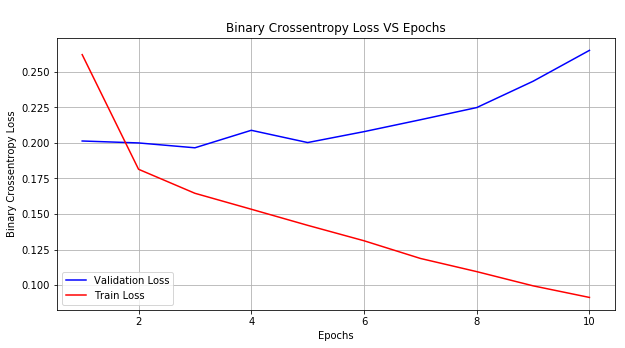

In [38]:
# Final evaluation of the model
scores = model1.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model1_test = scores[1]
model1_train = max(history1.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,11))

# Validation loss
vy = history1.history['val_loss']
# Training loss
ty = history1.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

#Model (2 Lstm layers with dropout)

In [22]:
embedding_vecor_length = 32
model2 = Sequential()
model2.add(Embedding(len(vocabulary)+1, embedding_vecor_length, input_length=max_review_length))
model2.add(LSTM(100, return_sequences=True,dropout=0.4, recurrent_dropout=0.4))
model2.add(LSTM(100, dropout=0.4, recurrent_dropout=0.4))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           2291584   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          53200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 2,425,285
Trainable params: 2,425,285
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# Fitting the data to the model
history2 = model2.fit(X_train, Y_train, nb_epoch=10, batch_size=512 ,verbose=1,validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


C:\Users\IDM LAB-01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 182068 samples, validate on 182068 samples
Epoch 1/10
182068/182068 [==============================] - 470s 3ms/step - loss: 0.2742 - acc: 0.8939 - val_loss: 0.2041 - val_acc: 0.9194
Epoch 2/10
182068/182068 [==============================] - 416s 2ms/step - loss: 0.1954 - acc: 0.9240 - val_loss: 0.1966 - val_acc: 0.9230
Epoch 3/10
182068/182068 [==============================] - 424s 2ms/step - loss: 0.1818 - acc: 0.9299 - val_loss: 0.1964 - val_acc: 0.9241
Epoch 4/10
182068/182068 [==============================] - 425s 2ms/step - loss: 0.1705 - acc: 0.9343 - val_loss: 0.2005 - val_acc: 0.9241
Epoch 5/10
182068/182068 [==============================] - 417s 2ms/step - loss: 0.1632 - acc: 0.9370 - val_loss: 0.1965 - val_acc: 0.9227
Epoch 6/10
182068/182068 [==============================] - 418s 2ms/step - loss: 0.1573 - acc: 0.9400 - val_loss: 0.2016 - val_acc: 0.9241
Epoch 7/10
182068/182068 [==============================] - 414s 2ms/step - loss: 0.1505 - acc: 0.9424 - val

Accuracy: 92.36%


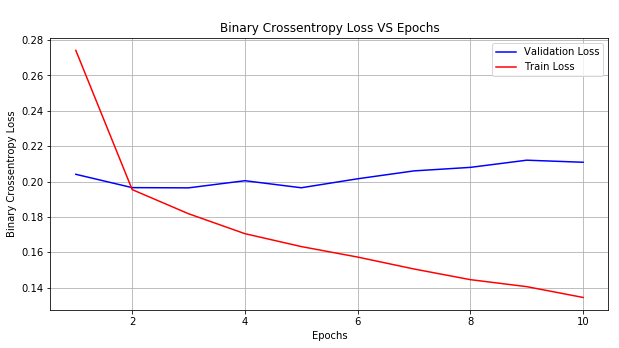

In [24]:
# Final evaluation of the model
scores = model2.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model2_test = scores[1]
model2_train = max(history2.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,11))

# Validation loss
vy = history2.history['val_loss']
# Training loss
ty = history2.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [28]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Model","Train accuracy","Test accuracy"]
x.add_row(['1 LSTM Layer', '96.64' , '91.5'])
x.add_row(['2 Lstm layers with dropout',model2_train,model2_test])

print(x)
with open('LSTM_IMDB_result.txt', 'w') as w:
    w.write(str(x))

+----------------------------+--------------------+--------------------+
|           Model            |   Train accuracy   |   Test accuracy    |
+----------------------------+--------------------+--------------------+
|        1 LSTM Layer        |       96.64        |        91.5        |
| 2 Lstm layers with dropout | 0.9491234044671768 | 0.9235944811815453 |
+----------------------------+--------------------+--------------------+


Observation:

WE can get more accuracy if run more epochs.

Model 2 is better because having high test accuracy